In [1]:
from Graph import Graph
from Queue import Queue
from heuristic_func import *

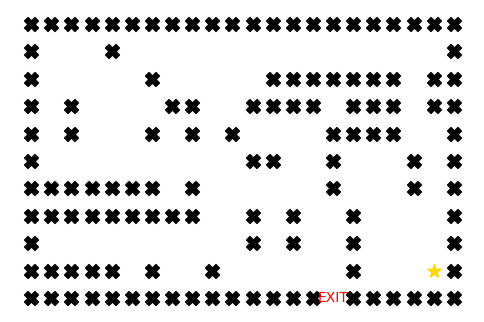

Starting point (x, y) = (9, 20)
Ending point (x, y) = (10, 15)


In [2]:
g = Graph('maze_test.txt')
g.visualize()

In [3]:
def GBFS(graph: Graph, hf, custom_start=None, custom_end=None):
    """
    Hàm tìm kiếm theo giải thuật Greedy Best First Search. Các tham số:
    - `graph`: đồ thị cần tìm kiếm.
    - `hf`: con trỏ đến hàm heuristics.
    `hf` phải có signature như sau: `hf(label1, label2, label_to_coord)`, trả về chi phí từ label1 đến label2.
    - `custom_start`: nhãn bắt đầu tùy chỉnh. Nếu không có thì lấy nhãn bắt đầu của đồ thị truyền vào.
    - `custom_end`: nhãn kết thúc tùy chỉnh. Hành xử tương tự như trên.
    """
    
    # Kiểm tra người dùng có specify điểm bắt đầu và kết thúc tùy chỉnh hay không
    start_label = custom_start if custom_start else graph.start_label
    end_label = custom_end if custom_start else graph.end_label
    
    # Hàng đợi ưu tiên
    fringe = Queue(priority=True)
    
    # Khởi tạo danh sách track các node kề trước trong đường đi đến đích 
    # Format: {succ_node: prev_node}
    # Cũng là tập các đỉnh đã viếng thăm
    visited = {start_label: None}
    
    # Gắn node bắt đầu vào hàng đợi với chi phí 0
    fringe.push(start_label, 0)
    
    while not fringe.is_empty():
        # Lấy ra node có chi phí thấp nhất
        current_node, current_cost = fringe.pop()
        
        # Lấy ra danh sách các đỉnh kề với node này
        successors = graph.get_successor(current_node)
        
        # Kiểm tra từng node kế 
        for succ_node, _ in successors:
            # Kiểm tra xem node đã viếng chưa. Nếu chưa thì thêm vào fringe
            if succ_node not in visited:
                visited[succ_node] = current_node
                heuristic_cost = hf(succ_node, end_label, g.label_to_coord)
                fringe.push(succ_node, heuristic_cost)
                
            # Nếu node kế là đích đến: ồ yeah
            if succ_node == end_label:
                return visited
            
    return None

CPU times: user 236 µs, sys: 273 µs, total: 509 µs
Wall time: 513 µs


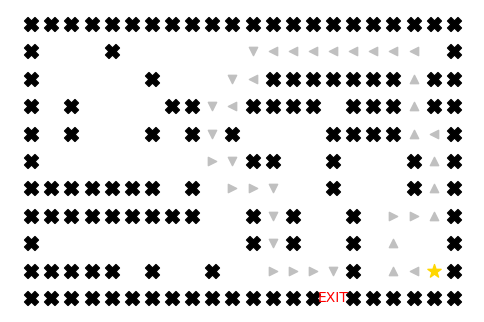

Starting point (x, y) = (9, 20)
Ending point (x, y) = (10, 15)


In [4]:
# Danh sách truy ngược đường đi
%time backtracking = GBFS(g, euclide_heuristic)
# Danh sách các nhãn của đường đi
labeled_path = g.backtrack(backtracking)
# Danh sách các tọa độ của đường đi
coord_path = g.convert_path_to_coord(labeled_path)
g.visualize(coord_path)